## THETA FORECASTING

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import ta

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta, RNNModel, NBEATSModel
from darts.metrics import mape, rmse

from darts.models import StatsForecastAutoTheta

/home/mehmet/.pyenv/versions/assist_trader/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../raw_data/20230609-170514-daily-processed-data.csv")

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,...,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,...,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,...,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,...,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,...,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,...,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.58092,1,58.137761,-1
1358,2023-06-01,27096.90,27108.80,27030.30,27081.90,5248.193,-0.065417,-468592.905790,30.792695,27028.789669,...,0.961442,4221.02,5.25,5.08,1,-0.02817,-0.35878,1,59.776339,-1
1359,2023-06-02,26850.50,26934.00,26849.00,26881.40,7588.041,-0.049525,-249646.914176,48.281993,26917.156581,...,1.044489,4282.37,5.25,5.08,-1,0.13181,0.46197,-1,52.103400,1
1360,2023-06-03,27159.40,27235.80,27132.00,27190.00,7451.957,0.038738,70819.873604,37.094107,27073.922697,...,1.050526,4282.37,5.25,5.08,1,1.55476,1.26044,1,56.726080,1


In [5]:
freq = '1d'
target_col = 'close'
time_col = 'timestamp'
series = TimeSeries.from_dataframe(df, time_col=time_col, value_cols=[target_col], freq=freq)

In [6]:
model = StatsForecastAutoTheta()

In [58]:
train, val = series.split_after(pd.Timestamp('2023-01-01'))

In [59]:
#model.fit(train)
#forecast = model.predict(1)
#print("model {} obtains MAPE: {:.2f}%".format(model, mape(val[0], forecast)))

In [60]:
forecast = model.fit(train)

In [15]:
out = model.predict(1)

In [39]:
yr = out.time_index[0].year
mnth = out.time_index[0].month
day = out.time_index[0].day
full = f'{yr}-{mnth}-{day}'

In [40]:
full

'2023-1-2'

In [ ]:
#forecast1 = model.predict(5)
#print("Model {} obtains RMSE: {:.2f}".format(model, rmse(val[0], forecast1)))

In [ ]:
forecasts_list1 = []
# define a for loop for slicing the train set and make forecasts

for v in range(len(val)):
    model= StatsForecastAutoTheta()
    
    while v>=1 and v<len(val):
        train =train.append(val[0])
        val=val[1:]
        model.fit(train)
        forecasts_list1.append(model.predict(1).pd_dataframe())
    print(forecasts_list1)

In [ ]:
forecast 

In [43]:
forecasts_list = []
# define a for loop for slicing the train set and make forecasts

for v in range(len(val)):
    model= StatsForecastAutoTheta()
    
    while v>=1 and v<len(val):
        train =train.append(val[0])
        val=val[1:]
        model.fit(train)
        pred = model.predict(1)
        yr = pred.time_index[0].year
        mnth = pred.time_index[0].month
        day = pred.time_index[0].day
        full = f'{yr}-{mnth}-{day}'
       
        forecasts_list.append((pred.values()[0][0], full))
print(forecasts_list)

[(16602.3359375, '2023-1-3'), (16755.814453125, '2023-1-4'), (16665.130859375, '2023-1-5'), (16823.2734375, '2023-1-6'), (16845.255859375, '2023-1-7'), (16927.6015625, '2023-1-8'), (16937.017578125, '2023-1-9'), (16954.59375, '2023-1-10'), (17175.994140625, '2023-1-11'), (17456.70703125, '2023-1-12'), (17552.58984375, '2023-1-13'), (18817.67578125, '2023-1-14'), (19806.623046875, '2023-1-15'), (20911.759765625, '2023-1-16'), (20920.701171875, '2023-1-17'), (21144.306640625, '2023-1-18'), (21315.1640625, '2023-1-19'), (20794.564453125, '2023-1-20'), (20937.244140625, '2023-1-21'), (22305.970703125, '2023-1-22'), (23199.388671875, '2023-1-23'), (22600.6171875, '2023-1-24'), (22999.041015625, '2023-1-25'), (22907.5, '2023-1-26'), (23597.28515625, '2023-1-27'), (23089.107421875, '2023-1-28'), (23088.40234375, '2023-1-29'), (23005.28125, '2023-1-30'), (23798.837890625, '2023-1-31'), (22764.32421875, '2023-2-1'), (22952.3828125, '2023-2-2'), (23688.166015625, '2023-2-3'), (23468.88671875, '2

In [47]:
values = [x[0] for x in forecasts_list]
dates = [x[1] for x in forecasts_list]
df = pd.DataFrame({'vals':values, 'timestamp': dates})
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [48]:
df

,vals,timestamp
0,16602.335938,2023-01-03
1,16755.814453,2023-01-04
2,16665.130859,2023-01-05
3,16823.273438,2023-01-06
4,16845.255859,2023-01-07
...,...,...
148,27662.976562,2023-05-31
149,27717.464844,2023-06-01
150,27096.074219,2023-06-02
151,26895.906250,2023-06-03


In [53]:
df.set_index('timestamp', inplace= True)

KeyError: "None of ['timestamp'] are in the columns"

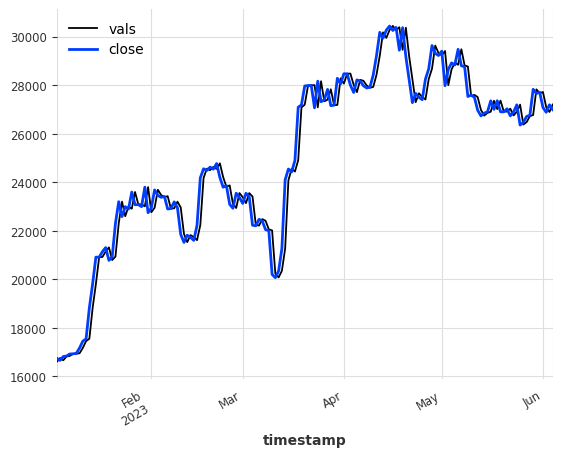

In [61]:
df.plot()
val.plot()

In [ ]:
values = [x[0] for x in forecasts_list]

In [ ]:
close1 = 1000
open1 = 950
high1= 1050
low1 = 900
prediction_2 = 910
atr_value= 30

In [ ]:
if close1> prediction_2:
    print("short trade")
    take_profit = (close1-prediction_2)/2
    stop_level = atr_value
for close in 